# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [54]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [55]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [3]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15223 entries, 0 to 15222
Data columns (total 52 columns):
AGREEMENT_RK                  15223 non-null int64
TARGET                        15223 non-null int64
AGE                           15223 non-null int64
SOCSTATUS_WORK_FL             15223 non-null int64
SOCSTATUS_PENS_FL             15223 non-null int64
GENDER                        15223 non-null int64
CHILD_TOTAL                   15223 non-null int64
DEPENDANTS                    15223 non-null int64
EDUCATION                     15223 non-null object
MARITAL_STATUS                15223 non-null object
GEN_INDUSTRY                  13856 non-null object
GEN_TITLE                     13856 non-null object
ORG_TP_STATE                  13856 non-null object
ORG_TP_FCAPITAL               13858 non-null object
JOB_DIR                       13856 non-null object
FAMILY_INCOME                 15223 non-null object
PERSONAL_INCOME               15223 non-null object
REG_ADDRESS_PRO

In [5]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14910 entries, 0 to 14909
Data columns (total 52 columns):
AGREEMENT_RK                  14910 non-null int64
TARGET                        14910 non-null int64
AGE                           14910 non-null int64
SOCSTATUS_WORK_FL             14910 non-null int64
SOCSTATUS_PENS_FL             14910 non-null int64
GENDER                        14910 non-null int64
CHILD_TOTAL                   14910 non-null int64
DEPENDANTS                    14910 non-null int64
EDUCATION                     14910 non-null object
MARITAL_STATUS                14910 non-null object
GEN_INDUSTRY                  13564 non-null object
GEN_TITLE                     13564 non-null object
ORG_TP_STATE                  13564 non-null object
ORG_TP_FCAPITAL               13567 non-null object
JOB_DIR                       13564 non-null object
FAMILY_INCOME                 14910 non-null object
PERSONAL_INCOME               14910 non-null object
REG_ADDRESS_PRO

In [ ]:
df_train.head()

## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [7]:
df_train.loc[:, 'sample'] = 'train' # добавляем стобец со значениями train в тренировочную выборку
df_test.loc[:, 'sample'] = 'test' # добавляем стобец со значениями test в проверочную выборку

In [8]:
df = df_test.append(df_train).reset_index(drop=True) #склеиваем две таблицы с данными

In [9]:
df.shape # проверяем склейку

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [10]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Высшее', 'Ученая степень', 'Неоконченное высшее', 'Среднее специальное', 'Неполное среднее', 'Среднее', 'Два и более высших образования'}


MARITAL_STATUS
{'Не состоял в браке', 'Разведен(а)', 'Вдовец/Вдова', 'Гражданский брак', 'Состою в браке'}


GEN_INDUSTRY
{nan, 'СМИ/Реклама/PR-агенства', 'Торговля', 'Образование', 'Коммунальное хоз-во/Дорожные службы', 'Транспорт', 'Нефтегазовая промышленность', 'Другие сферы', 'Государственная служба', 'Информационные технологии', 'Развлечения/Искусство', 'Подбор персонала', 'Управляющая компания', 'Информационные услуги', 'Здравоохранение', 'Юридические услуги/нотариальные услуги', 'Наука', 'Банк/Финансы', 'Энергетика', 'Недвижимость', 'Логистика', 'Сельское хозяйство', 'Маркетинг', 'Страхование', 'Строительство', 'ЧОП/Детективная д-ть', 'Химия/Парфюмерия/Фармацевтика', 'Металлургия/Промышленность/Машиностроение', 'Сборочные производства', 'Туризм', 'Салоны красоты и здоровья', 'Ресторанный бизнес/Общественное питание'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [ ]:
# тренируемся с автозаменой

In [ ]:
df['PERSONAL_INCOME']= df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

In [ ]:
df['CREDIT']= df['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')

In [ ]:
df['FST_PAYMENT']= df['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')

In [ ]:
df['LOAN_AVG_DLQ_AMT']= df['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')

In [ ]:
df['LOAN_MAX_DLQ_AMT']= df['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

Пропуски в данных есть.  
Столбец PREVIOUS_CARD_NUM_UTILIZED  содержится всего 600 заполненных строк (из 30133) , можно заполнить данне нулями, но лучше удалить так как данных слишком мало  и среднюю величину вписывать не корректно. Это может быть не корректный резльтат обучения.  
Пропуски в категориальных данных можно заполнить данными, например указать значение "Не заполнено" и тогда при трансформации (get_dummies) такие строки сформируют отдельную группу данных (столбец) по которому так же пройдет обучение. 
Пропуски в WORK_TIME лучше заполнить либо средними значениями, либо (лучший вариант, но пока не делал)  средним по направлению работы.

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

Перекодировать в цифровые значения (get_dummies),
часть можно удалить - например адреса по прописке и факт, так как они не так важны на мой взгляд. Хотя удаление и добавление большой разницы не дало.

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [11]:
def preproc_data(df_input):
   
    
   
    # Копируем лист df в локальный лист df_l, который будет изменяться
    df_l = df_input.copy()
    # корректируем данные в столбцах, удаляем лишнее, перекодируем object в цифру
    df_l['PERSONAL_INCOME'] = df_l['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')
    df_l['CREDIT'] = df_l['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_l['FST_PAYMENT'] = df_l['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_l['LOAN_AVG_DLQ_AMT'] = df_l['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_l['LOAN_MAX_DLQ_AMT'] = df_l['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')

    df_l.fillna(df[['GEN_TITLE','GEN_INDUSTRY', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 
                    'TP_PROVINCE', 'REGION_NM']].fillna('Не указано'), inplace=True) 
    df_l.loc[df_l['WORK_TIME'].isnull(), 'WORK_TIME'] = df_l['WORK_TIME'].median()

    df_l = df_l.drop(['AGREEMENT_RK'], axis = 1)

    df_l = pd.get_dummies(df_l, columns = [
        'GEN_TITLE', 'EDUCATION','MARITAL_STATUS','GEN_INDUSTRY', 'ORG_TP_STATE','ORG_TP_FCAPITAL', 'JOB_DIR',
        'FAMILY_INCOME','REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE','POSTAL_ADDRESS_PROVINCE',
                      'TP_PROVINCE','REGION_NM','REG_FACT_FL','FACT_POST_FL','REG_POST_FL',
                      'REG_FACT_POST_FL', 'REG_FACT_POST_TP_FL','PREVIOUS_CARD_NUM_UTILIZED', 'REGION_NM'])
    return df_l



In [12]:
df_preproc = df.pipe(preproc_data) 

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)# отделяем обучающую выборку
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)# отделяем тестовую выборку

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [13]:
y = df_train_preproc['TARGET']# отделяем таргет в выборке для обучения в переменную
df_train_preproc = df_train_preproc.drop(['TARGET'], axis = 1) # удаляем столбец с таргетом из выборки обучения
# таргет = y и выборка = df_train_preproc

In [14]:
y_test_1 = df_test_preproc['TARGET'] #отделяем таргет в выборке для проверки в переменную
df_test_preproc = df_test_preproc.drop(['TARGET'], axis = 1)#удаляем столбец с таргетом из выборки для проверки
# таргет = y_test_1 и выборка = df_test_preproc

#### Задание 5. Обучение и оценка качества разных моделей

In [15]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(df_train_preproc, y, test_size=0.3, random_state = 42)
# делим выборку train  на части (с суффиксом 1  на всякий случай, чтобы отделить)

In [64]:
X_train1.info()  # проверяем разделение, грузить данне не хочет - много столбцов

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10656 entries, 14961 to 22180
Columns: 467 entries, AGE to REGION_NM_ЮЖНЫЙ
dtypes: float64(6), int64(25), uint8(436)
memory usage: 7.3 MB


In [17]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression # пока не проходили не пробуем

from sklearn.tree import DecisionTreeClassifier # пробуем fit
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(df_train_preproc, y)
predict_fit = dtc.predict(X_test1)

from sklearn.ensemble import RandomForestClassifier # пробуем predict
rfc = RandomForestClassifier()
rfc.fit(X_train1, y_train1)
predict_rfc = rfc.predict(X_test1)

from sklearn.ensemble import RandomForestClassifier # пробуем predict_proba
rfc = RandomForestClassifier()
rfc.fit(X_train1, y_train1)
predict_rfc_p = rfc.predict_proba(X_test1)

In [18]:
predict_rfc_p #на всякий случай смотрим predict proba

array([[ 0.9,  0.1],
       [ 0.7,  0.3],
       [ 0.8,  0.2],
       ..., 
       [ 0.8,  0.2],
       [ 0.8,  0.2],
       [ 0.9,  0.1]])

In [62]:
# считаем метрики
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

#метрики Fit
print('precision', precision_score(y_test1, predict_fit))
print('recall', recall_score(y_test1, predict_fit))
print('accuracy', accuracy_score(y_test1, predict_fit))
print('='*40)
print('')

# метрики predict rfc
print('precision_r', precision_score(y_test1, predict_rfc))
print('recall_r', recall_score(y_test1, predict_rfc))
print('accuracy_r', accuracy_score(y_test1, predict_rfc))
print('='*40)
print('')



precision 1.0
recall 1.0
accuracy 1.0

precision_r 0.315789473684
recall_r 0.0108108108108
accuracy_r 0.876943288811



In [21]:
sorted(predict_fit)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [22]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)
from sklearn.metrics import precision_recall_curve
#precision, recall, tresholds = precision_recall_curve(y_test1, predict_fit[:, 1]) при вводе получил ошибку 
#IndexError: too many indices for array. Исправил удалением параметра [:, 1]. Не уверен что это корректно

In [23]:
precision1, recall1, tresholds1 = precision_recall_curve(y_test1, predict_rfc) #тут я что то намудрил и параметр 
# [:,1] выдает ошибку, а без параметра работает
precision, recall, tresholds = precision_recall_curve(y_test1, predict_fit)

(-0.01, 1.01)

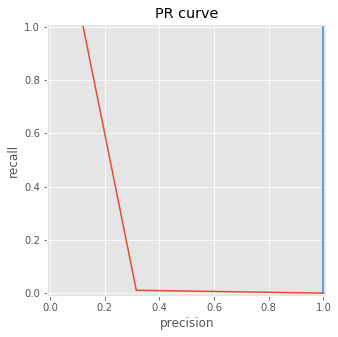

In [24]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize=(5, 5))
plt.plot(precision1, recall1)
plt.plot(precision, recall)
plt.ylabel('recall')
plt.xlabel('precision')
plt.grid(True)
plt.title('PR curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

(-0.01, 1.01)

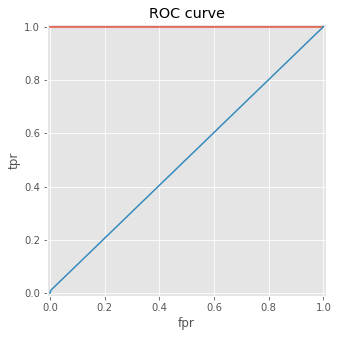

In [25]:
 #Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
fpr1, tpr1, thresholds1 = roc_curve(y_test1, predict_fit)
fpr, tpr, thresholds = roc_curve(y_test1, predict_rfc)
plt.figure(figsize=(5, 5))
plt.plot(fpr1, tpr1)
plt.plot(fpr, tpr)
#plt.plot([0, 1], [0, 1]) #закоментировал, так как перекрывает мой график (да, это кривовато...)
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
dtc = DecisionTreeClassifier() #запускаем кросс валидацию модели fit
cross_val_score(
    dtc, 
    df_train_preproc,
    y,
    scoring = 'roc_auc',
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
).mean() #и считаем средний roc_auc


0.52728643534202624

In [36]:
rfc = RandomForestClassifier() # проводим кросс валидацию модели predict_rfc
cross_val_score(
    rfc, 
    df_train_preproc,
    y,
    scoring = 'roc_auc',
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
).mean() # считаем среднее

0.57878480389380882

In [48]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки
# более точный результат у модели predict_rfc

X_train2, X_test2, y_train2, y_test2 = train_test_split(df_test_preproc, y_test_1, test_size=0.3, random_state = 42)

rfc = RandomForestClassifier(n_estimators = 10000)
rfc.fit(X_train2, y_train2)
predict_rfc_p1 = rfc.predict_proba(X_test2)


## Your Code Here

In [49]:
# Померить roc_auc на тесте
roc_auc_score(y_test2, predict_rfc_p1[:,1])

0.69321354251804079

In [50]:
predict_rfc_p # выгрузка predict как для ответа на конкурс

array([[ 1. ,  0. ],
       [ 0.8,  0.2],
       [ 0.9,  0.1],
       ..., 
       [ 1. ,  0. ],
       [ 0.8,  0.2],
       [ 1. ,  0. ]])

In [44]:
#построить ROC curve
precision2, recall2, tresholds2 = precision_recall_curve(y_test2, predict_rfc_p[:,1])

(-0.01, 1.01)

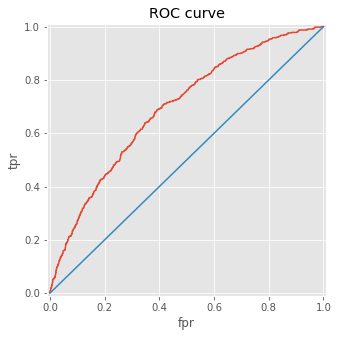

In [53]:
# Строим ROC кривую
%matplotlib inline 
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test2, predict_rfc_p1[:,1])
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))